## Model description

The buckling column model considered here is studied in [1], its dynamics is given by

$$
  \left\{ \begin{array}{lcl} \dot{x} & = & y \\ \dot{y} & = & 2 \cdot x - x^3 - 0.2 \cdot y + 0.1 \end{array} \right.
$$

In [1]:
using Reachability, TaylorIntegration, MathematicalSystems

In [2]:
@taylorize function buckling_column!(du, u, p, t)
    du[1] = u[2]
    du[2] = (((2*u[1] - (u[1]*(u[1]*u[1]))) - 0.2*u[2])) + 0.1

    return du
end

## Reachability settings

The initial set under our consideration is  $x\in [-0.5,-0.4]$, $y\in [-0.5,-0.4]$.

These settings are taken from the HyPro benchmarks [2].

[1] F. Zhao. Automatic Analysis and Synthesis of Controllers for Dynamical Systems Based on Phase-Space Knowledge. PhD thesis, Massachusetts Institute of Technology, 1992.

[2] https://ths.rwth-aachen.de/research/projects/hypro/buckling-column/

In [3]:
X₀ = Interval(-0.5, -0.4) × Interval(-0.5, -0.4)

CartesianProduct{Float64,Interval{Float64,IntervalArithmetic.Interval{Float64}},Interval{Float64,IntervalArithmetic.Interval{Float64}}}(Interval{Float64,IntervalArithmetic.Interval{Float64}}([-0.5, -0.4]), Interval{Float64,IntervalArithmetic.Interval{Float64}}([-0.5, -0.4]))

In [4]:
S = BlackBoxContinuousSystem(buckling_column!, 2)
P = InitialValueProblem(S, X₀);

## Results

In [5]:
sol = solve(P, Options(:T=>10.0),
            op=TMJets(Options(:max_steps=>1_000, :abs_tol=>1e-10, :orderT=>6, :orderQ=>2,:output_type=>Zonotope)));

In [6]:
using Plots, LaTeXStrings

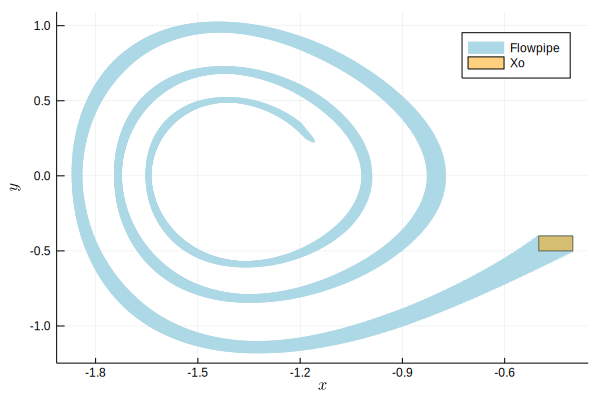

In [7]:
plot(sol, xlab=L"x", ylab=L"y", lw=0.2, color=:lightblue, lab="Flowpipe", legend=:topright)
plot!(X₀, color=:orange, lab="Xo")